In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def BitPlaneSlicing(im,k):
    img = cv2.imread(filename,0)
    bin_val = []

    w = img.shape[0]
    h = img.shape[1]

    for i in range(w):
        for j in range(h):
            bin_val.append(np.binary_repr(img[i][j], width=8)) #width is 8 bc total bits are 8

    new1 = (np.array([int(i[7]) for i in bin_val],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
    new2 = (np.array([int(i[6]) for i in bin_val],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
    new3 = (np.array([int(i[5]) for i in bin_val],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
    new4 = (np.array([int(i[4]) for i in bin_val],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
    new5 = (np.array([int(i[3]) for i in bin_val],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
    new6 = (np.array([int(i[2]) for i in bin_val],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
    new7 = (np.array([int(i[1]) for i in bin_val],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
    new8 = (np.array([int(i[0]) for i in bin_val],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
    listim = [new1,new2,new3,new4,new5,new6,new7,new8]
    
    
    return listim

## part 1

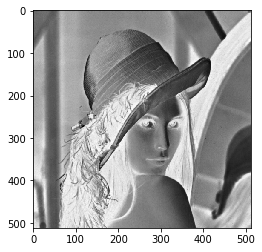

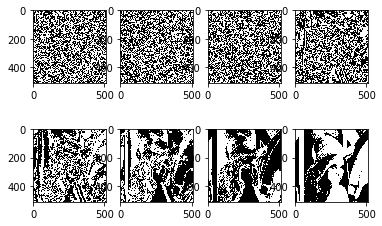

In [27]:
filename = "../input_data/lena.jpg"
k = 200
im = cv2.imread(filename,0)
im = (255-im)*(k/255)

plt.imshow(im,'gray')

a = BitPlaneSlicing(im,8)
# plt.imshow(a[4],'gray')
# plt.show()


# for i in range(8):
#     plt.subplot(2,4,(i+1))
#     plt.imshow(a[i],'gray')

for n in a:
    n = (255-n)*(k/255)

fig = plt.figure()

for i in range(8):
    plt.subplot(2,4,(i+1))
    plt.imshow(a[i],'gray')

## part 2


In [3]:
def gammaTransform(im,gamma):
    out = cv2.normalize(im.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    
#     ans = np.zeros((im.shape[0],im.shape[1]), dtype='uint8')
    ans = out**gamma
#     ans = ans*255
#     print(ans)
#     cv2.imshow()
#     return ret/gamma
#     ans = np.clip(ans,0,255)
    return ans

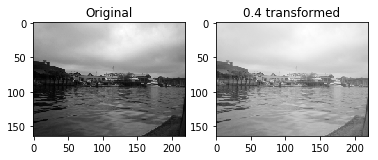

In [7]:
filename = "../input_data/gamma-corr.png"
gamma = 0.4
im = cv2.imread(filename,0)
ans = gammaTransform(im,gamma)

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(im,'gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(ans,'gray')
plt.title(str(gamma) + " transformed")
plt.show()

# cv2.imshow("ans",ans)

## part 3

In [48]:
def LinearTransform(img,k1,k2,a,b):
#     img = cv2.imread(im)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = img.astype(np.float64)/255
    x = img.shape[0]
    y = img.shape[1]
    len = img.shape[2]
    new = np.zeros((x,y,3), dtype = float)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(len):
                real = img[i][j][k]
                temp = float(k1)*(img[i][j][k]) + float(k2)

                if(real > a and real < b):
                    new[i][j][k] = temp
                else:
                    new[i][j][k] = real
#                 elif(temp > b):
#                     new[i][j][k] = b
#                 elif(temp < a):
#                     new[i][j][k] = a
                new[i][j][k] = new[i][j][k] * 255


#                 print(new[i][j][k])
                
                
#     new = img_as_uint(new)
#     fig = plt.figure()
    new = new.astype(np.uint8)
#     plt.imshow(new)
#     plt.show()
    return new
    

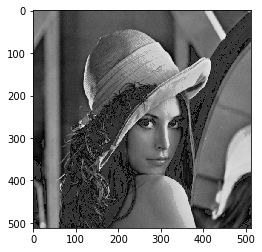

In [49]:
filename = "../input_data/lena.jpg"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ans = LinearTransform(img,1.33,-0.33,0.25,0.75)
fig2 = plt.figure()
plt.imshow(ans)
plt.show()


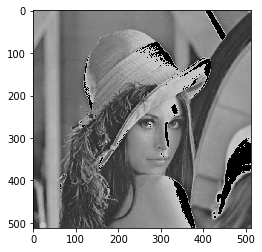

In [51]:
filename = "../input_data/lena.jpg"
a = [0,0.3,0.6,0.8]
b = [0.3,0.6,0.8,1]

k1 = [0,0.4,0.8,0]
k2 = [0,0.01,-0.01,0]

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(4):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)
    

fig2 = plt.figure()
plt.imshow(ans)
plt.show()
    

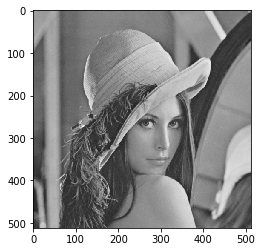

In [53]:
filename = "../input_data/lena.jpg"
a = [0,0.2,0.4,0.6,0.8]
b = [0.2,0.4,0.6,0.8,1]

k1 = [0.2,0.4,0.6,0.8,1]
k2 = [0,0,0,0,0]

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# fig2 = plt.figure()
for i in range(5):
    ans = LinearTransform(img,k1[i],k2[i],a[i],b[i])
#     plt.subplot(4,1,i+1)
#     plt.imshow(ans)
    

fig2 = plt.figure()
plt.imshow(ans)
plt.show()